# Tutorial - digital images
@moon

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt


## sample image
<img src="CameraMan.jpg" alt="Drawing" width="300"/>

In [2]:
# read an image file
img_array = plt.imread('CameraMan.jpg')
print(img_array.shape)
print(type(img_array))
print(img_array.dtype)

(512, 512)
<class 'numpy.ndarray'>
uint8


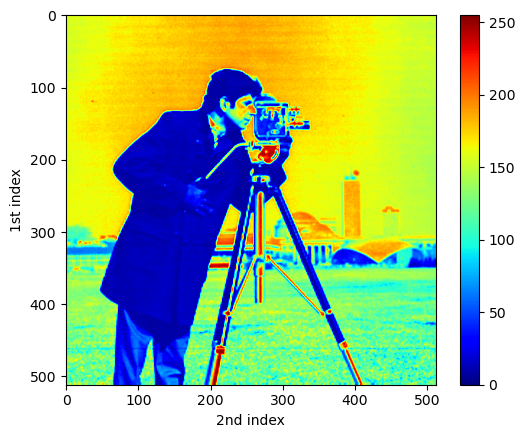

In [3]:
# visualize image
plt.imshow(img_array, cmap='jet', vmin=0, vmax=255) # try different psudo colors: gray jet plasma_r
plt.xlabel('2nd index')
plt.ylabel('1st index')
plt.colorbar()
plt.show()

## Digital image as array
<img src="NumpyOriginDirection.PNG" alt="Drawing" width="300"/>


In [4]:
# print the image pixel values
print('\nall pixels:')
print(img_array)
print('\npixels in a single row (index 100):')
print(img_array[100,:])
print('\npixels in a single column (index 400):')
print(img_array[:,400])
print('\npixel at specific row/column (100/400):')
print(img_array[100,400])


all pixels:
[[159 159 159 ... 153 153 152]
 [155 157 158 ... 152 151 150]
 [156 156 157 ... 152 151 150]
 ...
 [120 121 128 ... 125 116 106]
 [122 119 124 ... 129 117 104]
 [126 122 127 ... 112 110 119]]

pixels in a single row (index 100):
[164 163 160 158 160 163 162 159 159 158 159 161 163 162 160 157 159 159
 160 161 164 165 165 164 162 163 164 164 165 165 164 164 165 164 165 167
 166 165 166 169 166 163 162 164 164 163 163 164 163 165 167 169 169 167
 165 163 166 167 167 167 166 165 164 164 168 170 173 174 173 171 170 170
 169 168 170 174 174 172 171 172 174 173 171 171 172 174 175 175 173 173
 173 173 174 175 176 176 176 176 175 171 171 174 176 175 174 176 178 178
 177 176 177 178 180 180 180 179 178 178 177 177 176 176 178 179 178 176
 175 177 176 179 179 177 178 181 182 179 180 180 182 183 183 182 181 181
 180 180 180 181 181 181 180 180 178 180 181 180 178 177 178 179 180 179
 180 182 182 179 177 178 178 179 180 181 182 182 182 182 182 181 180 180
 181 182 182 181 180 180 182


the image:


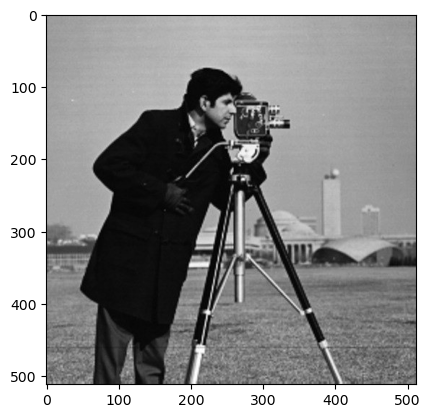


pixels in a single row (index 100):


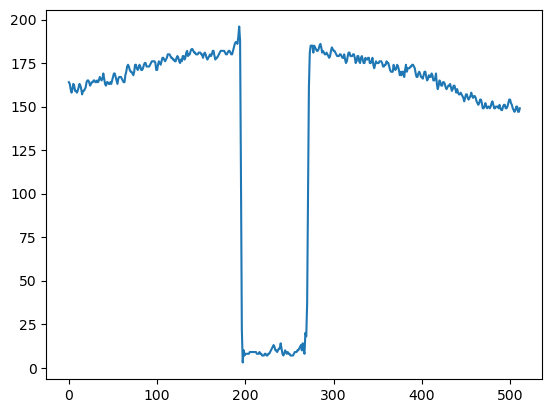


pixels in a single column (index 400):


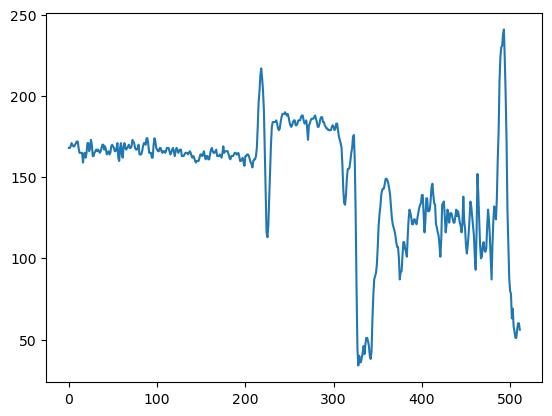

In [5]:
# visualize image profiles
print('\nthe image:')
plt.imshow(img_array, cmap='gray')
plt.show()
print('\npixels in a single row (index 100):')
plt.plot(img_array[100,:])
plt.show()
print('\npixels in a single column (index 400):')
plt.plot(img_array[:,400])
plt.show()

## pixel value manipulation

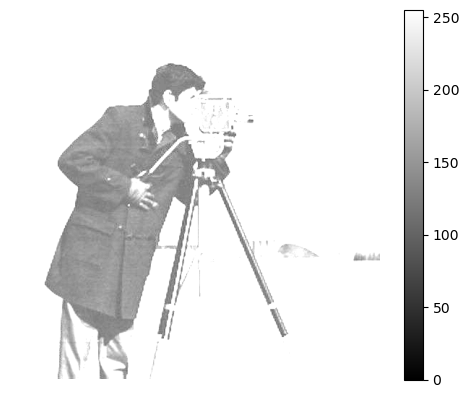

In [6]:
# brightness/contrast (level/window)
img_intensity_transformed = img_array.astype('int')   # to be able to chnage the values outside the 0-255 range
img_intensity_transformed = img_intensity_transformed *4   # change the contrast
img_intensity_transformed = img_intensity_transformed +100   # change the brightness
img_intensity_transformed = img_intensity_transformed.clip(0,255)   # clip the values to the 8-bit range
img_intensity_transformed = img_intensity_transformed.astype('uint8')   # change the tyoe to uint8

plt.imshow(img_intensity_transformed, cmap= 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.colorbar()
plt.show()

## array slicing

slice rows


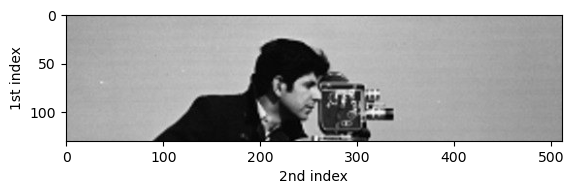

slice columns


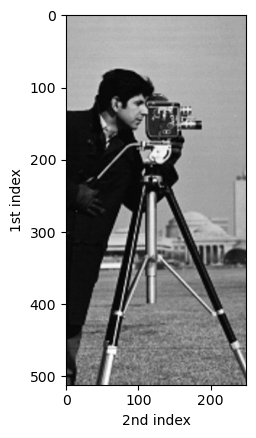

slice rows/columns


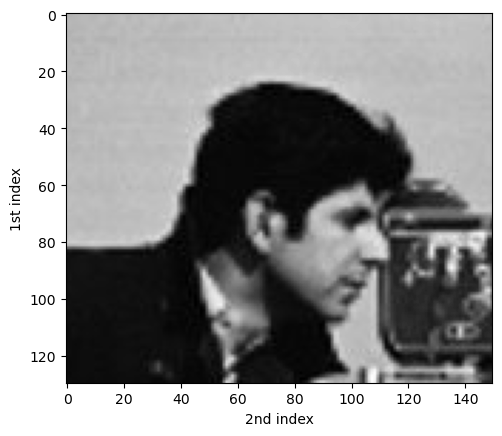

In [7]:
# image crop
print('slice rows')
plt.imshow(img_array[50:180], cmap='gray')
plt.xlabel('2nd index')
plt.ylabel('1st index')
plt.show()

print('slice columns')
plt.imshow(img_array[:,150:400], cmap='gray')
plt.xlabel('2nd index')
plt.ylabel('1st index')
plt.show()

print('slice rows/columns')
plt.imshow(img_array[50:180,150:300], cmap='gray')
plt.xlabel('2nd index')
plt.ylabel('1st index')
plt.show()

## image masking

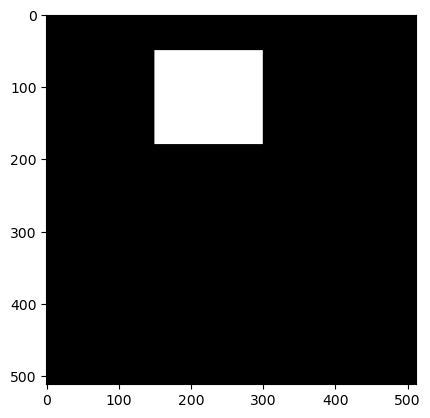

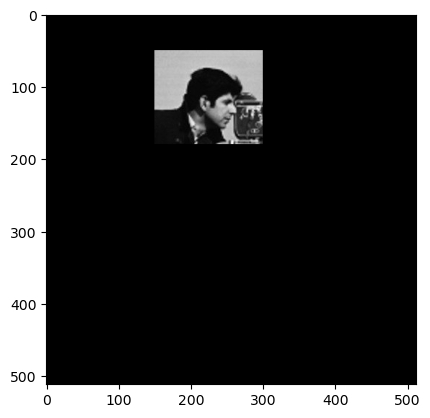

In [8]:
# rectangular mask with the same size as the image
mask_array = np.zeros(img_array.shape)
mask_array[50:180,150:300] = 1
plt.imshow(mask_array, cmap='gray')
plt.show()

# applying the mask
img_masked = img_array * mask_array
plt.imshow(img_masked, cmap='gray')
plt.show()


## Breakout
1- Change the top code for inverse masking (keeping pixels OUTSIDE the determined rectangle)
<img src="masking1.png" alt="Drawing" width="300"/>
2- Instead of a rectangular mask, generate a circular mask with center at indices C=[120,250] and radius of R=100 pixels and apply it to the image.
Hint: circle equation (X-C<sub>x</sub>)<sup>2</sup> + (Y-C<sub>y</sub>)<sup>2</sup> < R<sup>2</sup>
<img src="masking2.png" alt="Drawing" width="300"/>

## Solution template

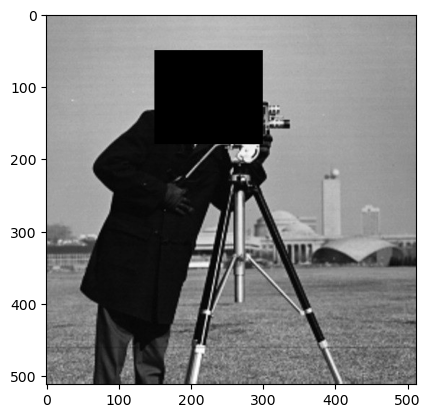

In [9]:
# part 1
inv_mask_array = 1 - mask_array
img_masked = img_array * inv_mask_array
plt.imshow(img_masked, cmap='gray')
plt.show()

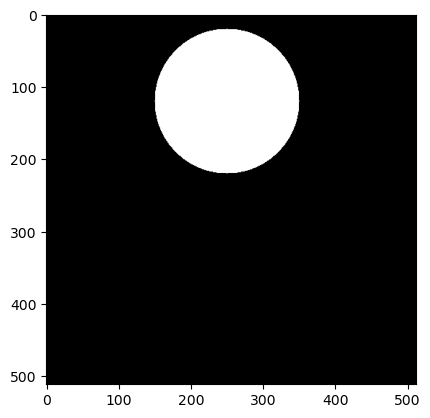

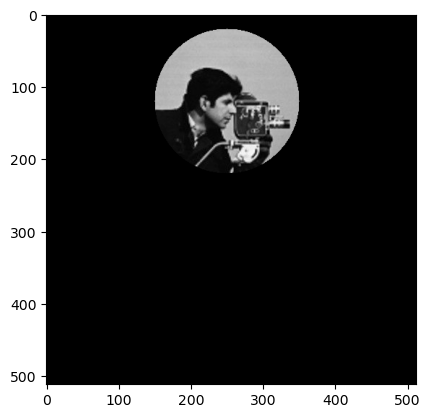

In [11]:
# part 2
mask_array = np.zeros(img_array.shape)
R = 100
for i in range(mask_array.shape[0]):
    for j in range(mask_array.shape[1]):
        if (i - 120)*(i - 120)+ (j - 250)*(j - 250) <= R*R:
            mask_array[i,j] = 1

plt.imshow(mask_array, cmap='gray')
plt.show()

plt.imshow(mask_array*img_array, cmap='gray')
plt.show() 
